In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduling
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 10))

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3633 - loss: 1.7211 - val_accuracy: 0.5504 - val_loss: 1.2586 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.5930 - loss: 1.1438 - val_accuracy: 0.6388 - val_loss: 1.0288 - learning_rate: 7.9433e-04
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6637 - loss: 0.9588 - val_accuracy: 0.6690 - val_loss: 0.9547 - learning_rate: 6.3096e-04
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7086 - loss: 0.8366 - val_accuracy: 0.6842 - val_loss: 0.9030 - learning_rate: 5.0119e-04
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7378 - loss: 0.7579 - val_accuracy: 0.6960 - val_loss: 0.8813 - learning_rate: 3.9811e-04
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.7590 - loss: 0.6947 - val_accuracy: 0.7063 - val_loss: 0.8601 - learning_rate: 3.1623e-04
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

    airplane       0.76      0.77      0.77      1000
  automobile       0.85      0.83      0.84      1000
        bird       0.64      0.59      0.62      1000
         cat       0.55      0.55      0.55      1000
        deer       0.67      0.68      0.67      1000
         dog       0.62      0.62      0.62      1000
        frog       0.77      0.82      0.80      1000
       horse       0.76      0.76      0.76      1000
        ship       0.83      0.83      0.83      1000
       truck       0.81      0.81      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



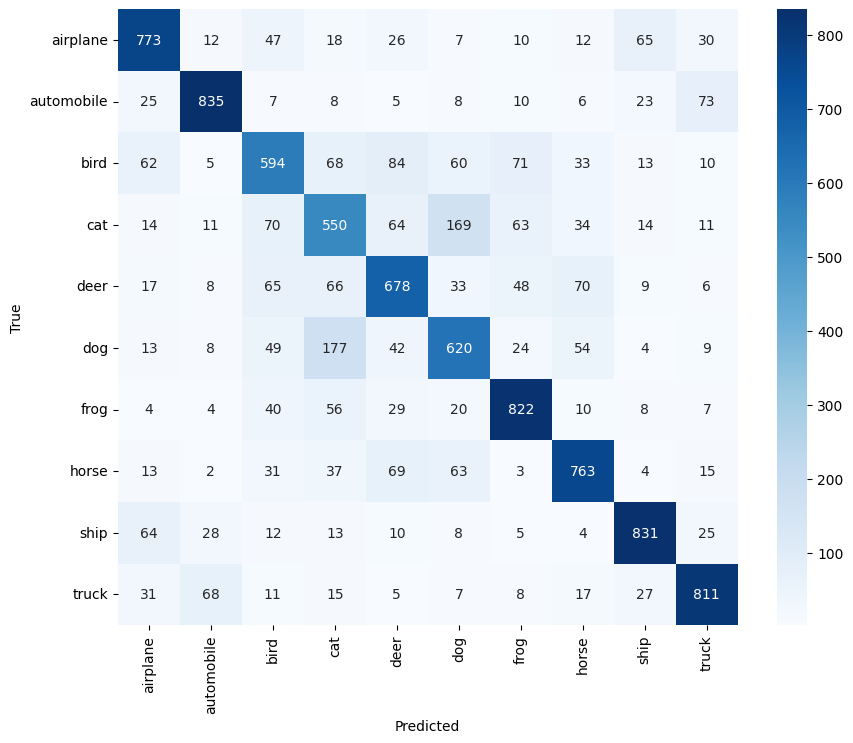

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
            yticklabels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
